In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("vgsales.csv")

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
df = df.dropna(subset=['Year'])


In [12]:
df['Year'] = df['Year'].astype(int)

In [13]:
df['Publisher'].isna().sum()


np.int64(36)

In [14]:
df = df.dropna(subset=['Publisher'])

In [15]:
df.duplicated().sum()


np.int64(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


## Top Publishers, Genres and Platforms by Global Sales


In [17]:
top5_publishers = (
    df.groupby('Publisher')['Global_Sales']
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .reset_index()
)

top5_genres = (
    df.groupby('Genre')['Global_Sales']
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .reset_index()
)

top5_platforms = (
    df.groupby('Platform')['Global_Sales']
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .reset_index()
)


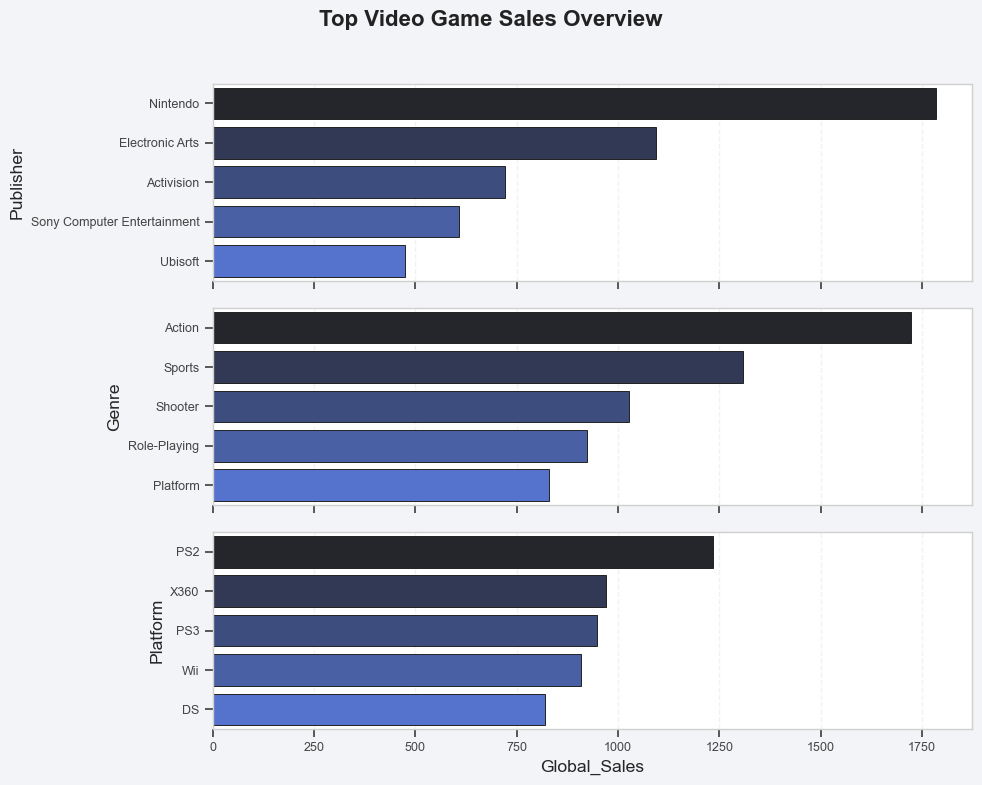

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", font_scale=1.05)

def light_for_lowest(values):
    vals = np.array(values)
    order = vals.argsort()
    ranks = np.empty_like(order, dtype=float)
    ranks[order] = np.linspace(0, 1, len(vals))

    pal = sns.dark_palette("royalblue", n_colors=256, reverse=True)
    return [pal[int(r * 255)] for r in ranks]


fig, axes = plt.subplots(
    3, 1,
    figsize=(10, 8),
    sharex=True,
    facecolor="#f3f4f7"
)

fig.suptitle(
    'Top Video Game Sales Overview',
    fontsize=16,
    fontweight='bold',
    color="#222222"
)

for ax in axes:
    ax.set_facecolor("#ffffff")
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color("#d0d0d0")
        spine.set_linewidth(1)

    ax.grid(axis='x', linestyle='--', alpha=0.25)
    ax.set_axisbelow(True)
    ax.tick_params(axis='both', labelsize=9, colors="#444444")


# -------------------- Publishers --------------------
colors_pub = light_for_lowest(top5_publishers['Global_Sales'])

sns.barplot(
    ax=axes[0],
    data=top5_publishers,
    x='Global_Sales',
    y='Publisher',
    hue='Publisher',
    palette=dict(zip(top5_publishers['Publisher'], colors_pub)),
    dodge=False,
    edgecolor='#222222',
    linewidth=0.7,
    legend=False
)


# -------------------- Genres --------------------
colors_gen = light_for_lowest(top5_genres['Global_Sales'])

sns.barplot(
    ax=axes[1],
    data=top5_genres,
    x='Global_Sales',
    y='Genre',
    hue='Genre',
    palette=dict(zip(top5_genres['Genre'], colors_gen)),
    dodge=False,
    edgecolor='#222222',
    linewidth=0.7,
    legend=False
)


# -------------------- Platforms --------------------
colors_plat = light_for_lowest(top5_platforms['Global_Sales'])

sns.barplot(
    ax=axes[2],
    data=top5_platforms,
    x='Global_Sales',
    y='Platform',
    hue='Platform',
    palette=dict(zip(top5_platforms['Platform'], colors_plat)),
    dodge=False,
    edgecolor='#222222',
    linewidth=0.7,
    legend=False
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



## Regional Contribution to Global Sales

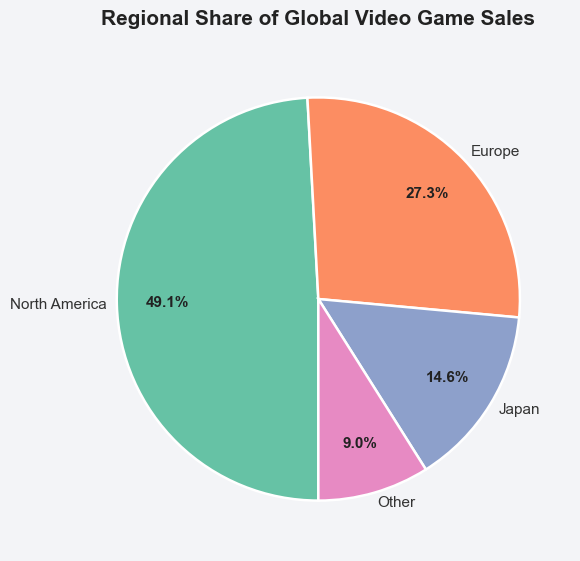

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

region_sales = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
labels = ['North America', 'Europe', 'Japan', 'Other']

# Seaborn-like color palette
colors = sns.color_palette("Set2", 4)  # soft but saturated categorical palette[web:43]

plt.figure(figsize=(6, 6), facecolor="#f3f4f7")
ax = plt.gca()
ax.set_facecolor("#fdfdfd")

wedges, texts, autotexts = plt.pie(
    region_sales,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=-90,                       # NA slice horizontal
    counterclock=False,
    wedgeprops={
        'edgecolor': 'white',
        'linewidth': 1.8,
        'antialiased': True
    },                                    # crisp borders[web:78]
    pctdistance=0.75,
    labeldistance=1.05,
    textprops={'fontsize': 11, 'color': '#333333'}
)

# Style percentage labels
for at in autotexts:
    at.set_fontweight('bold')
    at.set_color('#222222')

# Title styled like Seaborn examples
plt.title(
    'Regional Share of Global Video Game Sales',
    fontsize=15,
    fontweight='bold',
    pad=16,
    color="#222222"
)

# Remove axes frame for a clean gallery look
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()



## Relationship Between North America and Europe Sales
**Insight:**  
High-selling games in North America generally perform well in Europe, indicating similar market behavior.


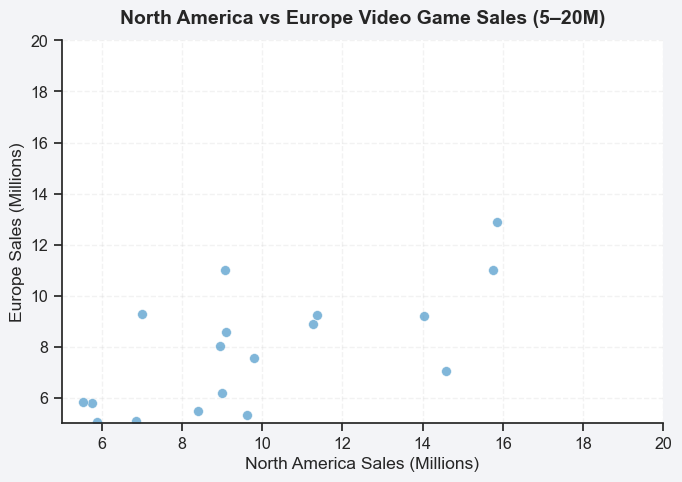

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_high = df[(df['NA_Sales'] >= 5) & (df['NA_Sales'] <= 20) &
             (df['EU_Sales'] >= 5) & (df['EU_Sales'] <= 20)]

sns.set_theme(style="ticks", font_scale=1.05)

plt.figure(figsize=(7, 5), facecolor="#f3f4f7")
ax = plt.gca()
ax.set_facecolor("#ffffff")

sns.scatterplot(
    data=df_high,
    x='NA_Sales',
    y='EU_Sales',
    s=50,
    alpha=0.7,
    color=sns.color_palette("Blues", 4)[2],
    edgecolor="white",
    linewidth=0.5
)
ax.set_xlim(5, 20)
ax.set_ylim(5, 20)

ax.set_title('North America vs Europe Video Game Sales (5–20M)',
             fontsize=14, fontweight='bold', pad=12)
ax.set_xlabel('North America Sales (Millions)')
ax.set_ylabel('Europe Sales (Millions)')

ax.grid(True, which='major', linestyle='--', alpha=0.25)
ax.set_axisbelow(True)
sns.despine(ax=ax)

plt.tight_layout()
plt.show()




**Insight:**  
Global video game sales show steady early growth, with acceleration beginning in the late 1980s.

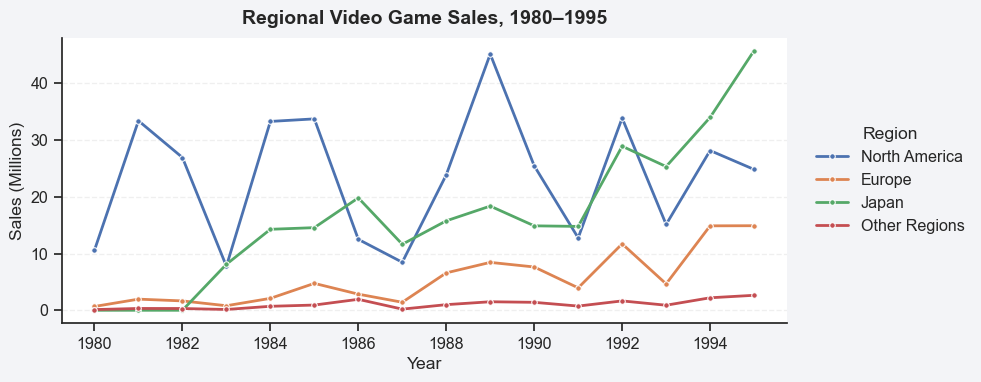

In [ ]:
early = sales_by_year_region.loc[1980:1995]

sns.set_theme(style="ticks", font_scale=1.05)  # clean, pro theme[web:157]

plt.figure(figsize=(10, 4), facecolor="#f3f4f7")
ax = plt.gca()
ax.set_facecolor("#ffffff")

# Use nicer color cycle and add markers
sns.lineplot(
    data=early,
    linewidth=2,
    dashes=False,
    marker="o",
    markersize=4,
    ax=ax
)

ax.set_title('Regional Video Game Sales, 1980–1995',
             fontsize=14, fontweight='bold', pad=10)
ax.set_ylabel('Sales (Millions)')
ax.set_xlabel('Year')

# Show only selected year ticks for readability
ax.set_xticks(range(1980, 1996, 2))  # every 2 years[web:153]

# Light grid and clean spines
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_axisbelow(True)
sns.despine(ax=ax)

# Place legend outside for a report-style look
ax.legend(title='Region', frameon=False, loc='center left',
          bbox_to_anchor=(1.02, 0.5))

plt.tight_layout()
plt.show()


## Conclusion

This analysis highlights how a small number of publishers and genres dominate the global video game market. Regional sales patterns show strong alignment between North America and Europe, while Japan follows different trends. These insights can support market strategy and regional targeting decisions.
